##Optimisation avec la méthode du gradient
---
<br>

**Description :**

Dans ce notebook, nous appliquons la méthode du gradient pour trouver le minimum d’une fonction quadratique simple. L’idée est de partir d’un point iitial et de se déplacer dans la direction opposée au gradient pour approcher le point où la fonction est minimale.

Le code calcule à chaque itération un nouveau point et conserve tous les points pour pouvoir visualiser la trajectoire de convergence.

Cette approche n’est pas seulement théorique, elle est utilisée dans des applications concrètes comme l’optimisation de modèles en machine learning, la finance pour maximiser le rendement ou minimiser le risque, et l’ingénierie pour améliorer les performances de systèmes.

<br>

**Objectif :**
Optimiser une fonction objectif à l'aide de la descente du gradient et illustrer la convergence vers le minimum.

<br>

**Contexte :**
- Fonction objectif :
$$J(x) = \frac{1}{2} x^T A x - b^T x$$


où A est une matrice 2×2 définie et b un vecteur 2×1.

- Gradient :
Le gradient de J(x) est calculé par:

$$\nabla J(x) = A x - b$$


La descente du gradient consiste à se déplacer dans la direction opposée au gradient pour atteindre le minimum.

---

Question 2)  Nous allons tester la méthode de descente du gradient vu en cours dans le cadre de notre exercice.


<ipython-input-8-e51c934fe604>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Tab[i, j] = J(x)


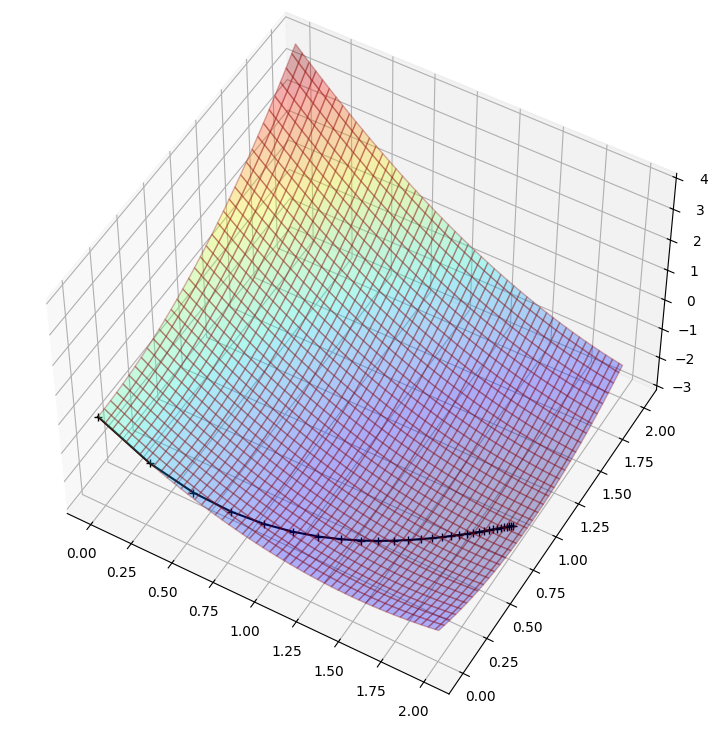

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#On commence par la definition de la fonctionnelle et de son gradient:
A = np.array([[2, -1], [-1, 2]])
b = np.array([[3], [0]])
def J(x):
    return 0.5 * x.T @ A @ x - b.T @ x
def gradJ(x):
    return  A @ x - b

# Puis on applique la "méthode" du gradient à partir du point x0, au pas rho,
# en poursuivant les itérations tant que :
#   - le nombre maximal d'itérations Nmax n'est pas atteint
#   - ET que la norme du gradient reste supérieure au seuil donné


def methode(J, gradJ, rho, x0, Nmax, seuil):
    xk = x0
    tab_x = xk
    i = 0
    while i < Nmax and np.linalg.norm(gradJ(xk)) > seuil:
        xk = xk - rho * gradJ(xk)  #Chaque nouveau point calculé va dans le sens
        # opposé au gradient et tend à approcher x*
        tab_x = np.append(tab_x, xk, axis=1)
        i= i+1
    return tab_x
#Le dernier point sera le plus proche de x* et nous permet donc d'approcher
#le minimum de J(x) tel que gradJ(x*)=0

x0 = np.array([[0.0], [0.0]])
TableauXk = methode(J, gradJ, rho=0.1, x0=x0, Nmax=100, seuil=0.1)

# Pour le graphe
x1 = np.linspace(0, 2, 100)
x2 = np.linspace(0, 2, 102)
Tab = np.zeros((100, 102))

for i in range(100):
    for j in range(102):
        x = np.array([[x1[i]], [x2[j]]])
        Tab[i, j] = J(x)

X1, X2 = np.meshgrid(x1, x2)
fig = plt.figure(figsize=(14, 9))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X1, X2, Tab.T, alpha=0.3, cmap=cm.jet, edgecolor='darkred')

# Ajout de la trajectoire
tabx = TableauXk[0, :]
taby = TableauXk[1, :]
tabz = np.array([J(np.array([[x], [y]])) for x, y in zip(tabx, taby)])

ax.plot(tabx, taby, tabz.flatten(), 'k+-')
ax.view_init(elev=50, azim=300)
plt.show()

**Question 3)**

Interpretation du graphique

On observe que lorsqu'on choisit un pas de 1 et 0,1, l'etreur à tendance à diverger. Cependant, plus le pas est grand plus cette divergence augmente. En effet, la droite verte (ρ=1) s'eloigne très nettement de 0, tant dis que la droite jaune diverge egalement mais plus lentement que la droite verte.

En revanche, la droite bleue (ρ=0.01) semble suivre un comportement beaucoup plus stable, avec une tendance à réduire l'erreur progressivement.En effet, cette courbe montre une diminution rapide de l'e
rreur à mesure que les itérations progressent, ce qui est caractéristique d'un bon choix de pas permettant de converger de manière plus précise et stable vers la solution x*, et ainsi d'approcher rapidement le minimum de la fonctionnelle.

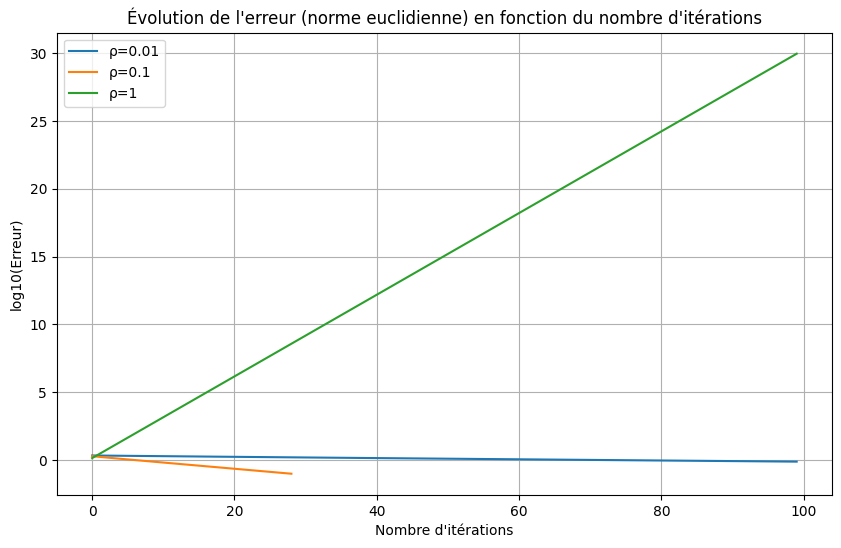

In [ ]:

# Premièrement, pour calculer l'erreur pour chaque xk calculé lors de cette
# méthode il va falloir définir la solution exacte x* que l'on cherche à approcher
x_etoile = np.linalg.inv(A) @ b

# J'applique ensuite la méthode du gradient en incluant le calcul de l'erreur à chaque
# itération afin d'obtenir une liste des erreurs obtenues
def methode(J, gradJ, rho, x0, Nmax, seuil, x_etoile):
    xk = x0
    tab_x = xk
    erreurs = []  # Liste pour stocker les erreurs (normes euclidiennes) à chaque itération
    i = 0
    while i < Nmax and np.linalg.norm(gradJ(xk)) > seuil:
        xk = xk - rho * gradJ(xk)
        tab_x = np.append(tab_x, xk, axis=1)
        # Calcul de l'erreur euclidienne entre xk et la solution exacte x_etoile
        erreur = np.linalg.norm(xk - x_etoile)
        erreurs.append(erreur)  # Ajout de l'erreur à la liste des erreurs
        i += 1
    return tab_x, erreurs  # Correction ici, on retourne 'erreurs' au lieu de 'errors'

# Initialisation des variables
x0 = np.array([[0.0], [0.0]])  # Point de départ
Nmax = 100  # Nombre maximal d'itérations
seuil = 0.1  # Seuil pour la norme du gradient
valeurs_pas = [0.01, 0.1, 1]  # Liste des différents pas de gradient à tester
erreurs_totales = {}  # Dictionnaire pour stocker les erreurs pour chaque valeur de pas

# Mise en place d'une boucle afin d'appliquer la méthode du gradient pour les différents pas
for pas in valeurs_pas:
    TableauXk, erreurs = methode(J, gradJ, rho=pas, x0=x0, Nmax=Nmax, seuil=seuil, x_etoile=x_etoile)
    erreurs_totales[pas] = erreurs  # Stockage des erreurs pour chaque pas

# Tracer l'évolution de l'erreur en fonction des itérations pour différents rho
plt.figure(figsize=(10, 6))

for pas in valeurs_pas:
    plt.plot(np.log10(erreurs_totales[pas]), label=f'ρ={pas}')  # Utilisation de log10 pour l'échelle logarithmique

plt.title('Évolution de l\'erreur (norme euclidienne) en fonction du nombre d\'itérations')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('log10(Erreur)')
plt.legend()
plt.grid(True)
plt.show()

**Question 4)**

Interpretation et explication:

Le taux de convergence numérique permet de mesurer l'efficacité de la méthode du gradient en faisant le rapport des erreurs entre deux itérations successives. Ainsi, un taux faible signifie qu'a mesure des itérration l'erreur diminue, entrainant une convergence stable, tandis qu'un taux élevé peut signaler une instabilité qui risque une divergence.

Notre objectif est de minimiser le taux de convergence numérique, on peut en déduire graphiquement que le pas optimal correspond au point où la courbe atteint son minimum, c'est-à-dire le pic du V. Si on choisit un pas plus petit que cette valeur, la convergence sera trop lente.Tant dis qu'un pas plus grand risquerait de rendre l'algorithme instable, avec des divergences de la solution.

Le pas optimal est d'environs 0,5.


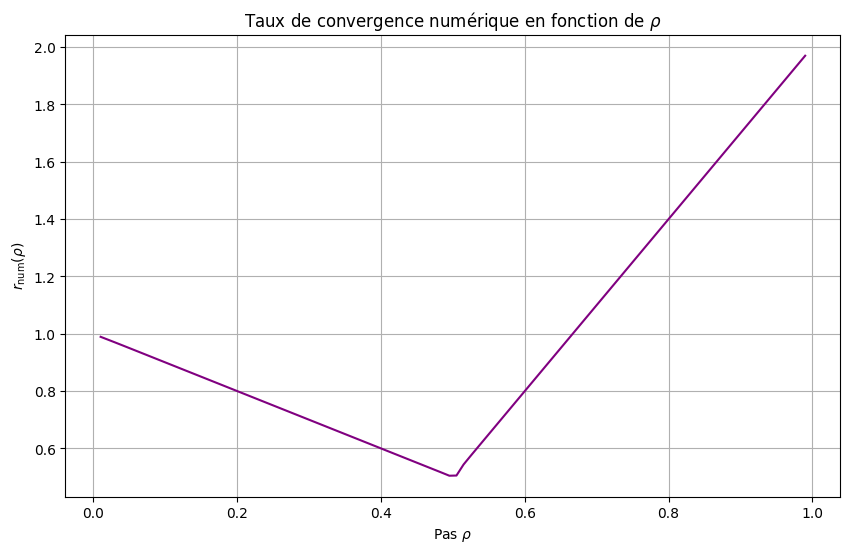

In [ ]:
valeurs_pas = np.linspace(0.01, 0.99, 100)
r_nums = []

for pas in valeurs_pas:
    path = Gradient_path(gradJ, pas, x0, N)
    err_N = np.linalg.norm(path[-1] - x_star)
    err_Nm1 = np.linalg.norm(path[-2] - x_star)
    r = err_N / err_Nm1
    r_nums.append(r)

plt.figure(figsize=(10, 6))
plt.plot(valeurs_pas, r_nums, color="purple")
plt.xlabel("Pas $\\rho$")
plt.ylabel("$r_{\\text{num}}(\\rho)$")
plt.title("Taux de convergence numérique en fonction de $\\rho$")
plt.grid(True)
plt.show()